In [6]:
import os
os.chdir("C:/Users/Anujl/OneDrive/Documents/Level5/AI/worksheet2")

In [7]:
import os
os.getcwd()

'C:\\Users\\Anujl\\OneDrive\\Documents\\Level5\\AI\\worksheet2'

In [8]:
import pandas as pd

bank = pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
object_columns = bank.select_dtypes(include='object').columns
object_columns
for col in object_columns:
    print(bank[col].unique())
bank.isnull().sum()


['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bank_numeric = bank.select_dtypes(exclude='object')
bank_numeric.to_csv("banknumericdata.csv", index=False) 

numeric = pd.read_csv("banknumericdata.csv")
numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
med_df = pd.read_csv("medical_students_dataset.csv")
med_df.info()
med_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

In [15]:
for col in med_df.columns:
    if med_df[col].isnull().sum() > 0:
        if med_df[col].dtype != "object":
            med_df[col].fillna(med_df[col].median(), inplace=True)
        else:
            med_df[col].fillna(med_df[col].mode()[0], inplace=True)

In [16]:
med_df.duplicated().sum()
med_df = med_df.drop_duplicates()


In [17]:
titanic = pd.read_csv("Titanic-dataset.csv")

subset = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]
first_class = subset[subset['Pclass'] == 1]

first_class['Fare'].mean()
first_class['Fare'].median()
first_class['Fare'].max()
first_class['Fare'].min()



np.float64(0.0)

In [18]:
first_class['Age'].isnull().sum()
first_class_clean = first_class.dropna(subset=['Age'])

In [19]:
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic2 = pd.concat([titanic, embarked_dummies], axis=1)
titanic2.drop(columns=['Embarked'], inplace=True)
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


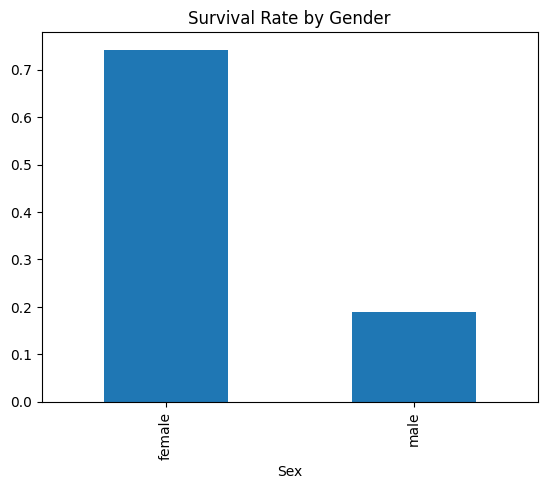

In [20]:
import matplotlib.pyplot as plt

titanic.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.show()


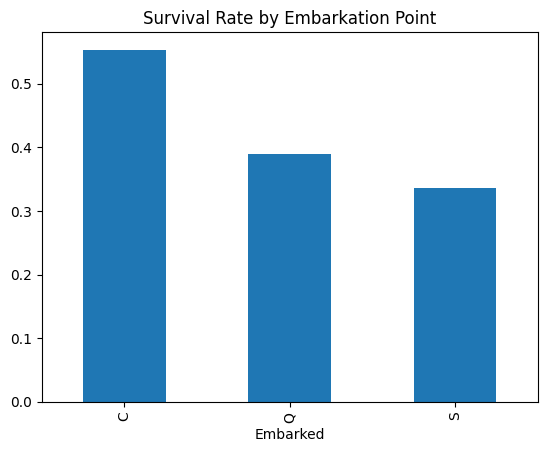

In [21]:
titanic.groupby('Embarked')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Embarkation Point")
plt.show()
